Attach the CSV file to CANVAS
Import the CSV file or use read_html to extract your data
Show the first 5 and last 5 rows of the dataset
Visualize your dataset with at least 3 visualizations
A histogram for the features you are interested in
A scatter plot for any relationships you are interested in (or boxplot if you plan to look at categorical variables)
Start working on your feature engineering
Show whether or not there are missing data
Show whether or not there are duplicates
Show whether or not there are outliers
List the variables you will be dummy coding
Write a description in a text cell with what you plan to do next. Make sure you address 1) how you will handle feature engineering, 2) what kind of analysis you want to do
 

You are welcome to submit more progress (e.g., more visualizations, feature engineering, or your analyses), but we will not grade/count anything past the feature engineering section. 

## Our libraries that we are importing:

In [1]:
# Imported libraries used for the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import io

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from scipy import stats

## Loading the CSV data:

In [2]:
# Importing and loading the CSV file data
df = pd.read_csv("CallofDutyModernWarfare.csv")

df.shape

(1558, 17)

In [3]:
# Showing the first 5 rows of the dataset
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
1,BOBOQQ3#7928912,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
2,TawheedAhmed42,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
3,WilcyWilson#2599001,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
4,Manuel Alarcon1#6037069,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0


In [4]:
# Showing the last 5 rows of the dataset
df.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,scorePerMinute,shots,deaths
1553,Skelevra#2429467,826,25187,1.158343,19,349,11,69641,2912,4127,5.578544,522,4338,323167,93.650275,392808,21744
1554,BigGunzGaming,373,12236,1.881593,11,351,14,6559,2197,2748,23.126316,95,1122,25157,21.506600,31716,6503
1555,Wong Fei Hung#1012391,1108,31623,1.148925,18,370,13,91355,3400,5832,4.670330,728,5295,304895,125.017059,396250,27524
1556,Super-Tosto69#8537760,1117,18704,1.876216,19,433,31,14715,3509,4768,23.870748,147,863,44293,21.994300,59008,9969
1557,Killopen#6131856,1746,51595,0.920238,19,435,10,145596,6231,9673,5.227349,1192,10472,600193,110.934232,745789,56067


## Visualizing the dataset:

Text(0.5, 1.0, 'Average Amount of Hours Spent Playing Call of Duty per Day')

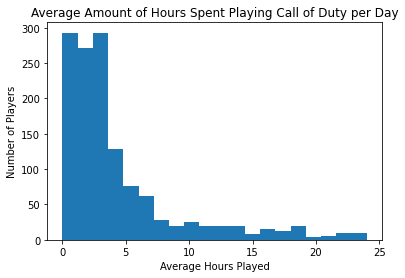

In [5]:
# Cleaning up the variable names so they are easier to understand
df.rename(columns={'name':'Username of Player'}, inplace=True)
df.rename(columns={'wins':'Match Wins'}, inplace=True)
df.rename(columns={'kills':'Match Kills'}, inplace=True)
df.rename(columns={'kdRatio':'Kill/Death Ratio'}, inplace=True)
df.rename(columns={'killstreak':'Kill Streak'}, inplace=True)
df.rename(columns={'level':'Level'}, inplace=True)
df.rename(columns={'losses':'Match Losses'}, inplace=True)
df.rename(columns={'hits':'Enemy Hits'}, inplace=True)
df.rename(columns={'timePlayed':'Hours Played'}, inplace=True)
df.rename(columns={'headshots':'Headshots'}, inplace=True)
df.rename(columns={'averageTime':'Average Hours Played per Day'}, inplace=True)
df.rename(columns={'gamesPlayed':'Number of Multiplayer Matches Played'}, inplace=True)
df.rename(columns={'assists':'Assisted Kills'}, inplace=True)
df.rename(columns={'misses':'Missed Hits'}, inplace=True)
df.rename(columns={'scorePerMinute':'Points Gained per Minute'}, inplace=True)
df.rename(columns={'shots':'Shots Taken'}, inplace=True)
df.rename(columns={'deaths':'Player Deaths'}, inplace=True)

# Creating a histogram based on number of players and their average hours spent playing CoD per day
plt.hist(df["Average Hours Played per Day"], bins=20, range = [0,24])
plt.xlabel('Average Hours Played')
plt.ylabel('Number of Players')
plt.title('Average Amount of Hours Spent Playing Call of Duty per Day')

Text(0.5, 1.0, 'Match Wins by Total Number of Hours Spent Playing CoD')

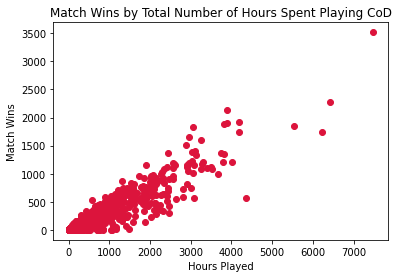

In [6]:
# Creating a scatterplot for amount of matchs won by total hours played
plt.scatter('Hours Played', 'Match Wins', data=df, color = 'crimson')
plt.xlabel('Hours Played', fontsize='medium')
plt.ylabel('Match Wins', fontsize='medium')
plt.title("Match Wins by Total Number of Hours Spent Playing CoD")

Text(0.5, 1.0, 'Kill/Death Ratio by Total Number of Hours Spent Playing CoD')

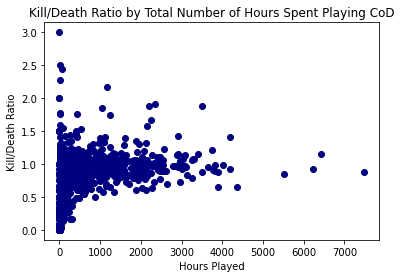

In [7]:
# Creating a scatterplot for kill/death ratios by total hours played
plt.scatter('Hours Played', 'Kill/Death Ratio', data=df, color = 'navy')
plt.xlabel('Hours Played', fontsize='medium')
plt.ylabel('Kill/Death Ratio', fontsize='medium');
plt.title("Kill/Death Ratio by Total Number of Hours Spent Playing CoD")

Text(0.5, 1.0, 'Tier Levels of Players')

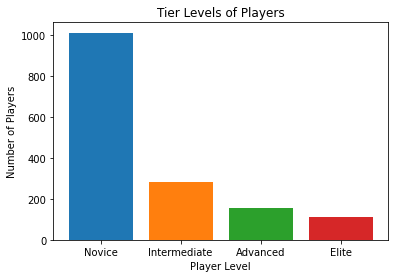

In [8]:
# Reorganizing levels into tiers to better view the data
novice = df[df.Level<=30]
intermediate = df[(df.Level>30) & (df.Level<=100)]
advanced = df[(df.Level>100) & (df.Level<=175)]
elite = df[df.Level>175]

# Generating a bar chart
var1=plt.bar('Novice',novice.count())
var2=plt.bar('Intermediate',intermediate.count())
var3=plt.bar('Advanced',advanced.count())
var4=plt.bar('Elite',elite.count())
plt.xlabel("Player Level")
plt.ylabel("Number of Players")
plt.title("Tier Levels of Players")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


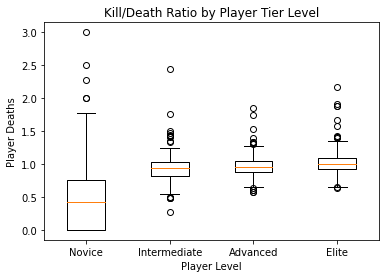

In [9]:
# Creating a boxplot
kdratio = [novice['Kill/Death Ratio'], intermediate['Kill/Death Ratio'], advanced['Kill/Death Ratio'], elite['Kill/Death Ratio']]
fig, ax = plt.subplots()
ax.boxplot(kdratio)
ax.set_title('Kill/Death Ratio by Player Tier Level')
ax.set_xlabel('Player Level')
ax.set_ylabel('Player Deaths')
ax.set_xticklabels(['Novice', 'Intermediate', 'Advanced', 'Elite'])
plt.show()

## Feature engineering:

In [10]:
# Show whether or not there are missing data
dropped_rows = df['Hours Played'].drop(df[df['Hours Played'] < 1].index, inplace=True)

df.shape

(1558, 17)

In [11]:
# Show whether or not there are duplicates
df = df.drop_duplicates(subset=['Username of Player'])

df.shape

(1558, 17)

In [12]:
# Show whether or not there are outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Match Wins                                168.000000
Match Kills                              3441.750000
Kill/Death Ratio                            0.693851
Kill Streak                                12.000000
Level                                      50.000000
Match Losses                                8.000000
Enemy Hits                               9015.500000
Hours Played                              481.500000
Headshots                                 601.750000
Average Hours Played per Day                7.085714
Number of Multiplayer Matches Played      110.500000
Assisted Kills                            609.750000
Missed Hits                             40906.750000
Points Gained per Minute                  221.648976
Shots Taken                             50781.000000
Player Deaths                            3684.750000
dtype: float64


## What's next:

I plan to still work on the visualizations with this data by nicluding more scatterplots (perhaps even subplots of this) to better understand the correlations for players. I'd like to learn more about if more time spent playing the Call of Duty increases player skills in terms of wins, kill-death ratios, headshots, and kills. Although I do think player level may play an importance, I think hours pent playing is more important because I know that the leveling system in the game is not entirely accurate towards skill level.


There are missing data in this dataset since after checking, 210 players had no hours logged, meaning they had created an account but never played, s these were removed. My data doesn't currently have any duplicates of player data for one user, but I do see quite a few outliers in the scatterplots and boxplot prior to removal of missing data. I will need to remove these outliers in order to retrieve more accurate information for the visualizations. Thus, once this is altered, new visualizations will need to be made to reflect the updated dataset.